In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.optimize import curve_fit
import matplotlib

plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
plt.rcParams.update({'font.size': 15})

In [6]:
kb = 1.380649*(10**-23)
T = 300

In [7]:
with open('../simulations/obb_nas/OBB_simulation_positions_x0.46_1.txt') as f:
    lines = f.readlines()
x = np.array([float(number) for number in lines[0][:-1].split(',')])
with open('../simulations/obb_nas/OBB_simulation_positions_y0.46_1.txt') as f:
    lines = f.readlines()
y = np.array([float(number) for number in lines[0][:-1].split(',')])
with open('../simulations/obb_nas/OBB_simulation_positions_z0.46_1.txt') as f:
    lines = f.readlines()
z = np.array([float(number) for number in lines[0][:-1].split(',')])

x = x - x.mean()
y = y - y.mean()
z = z - z.mean()
r = np.sqrt(np.power(x, 2)+np.power(y, 2))

In [8]:
rmse_z = np.sqrt(np.power(z,2).mean())
rmse_measure_z = np.sqrt(np.power(measures['z'].values, 2).mean())
conv_z = rmse_z/rmse_measure_z

NameError: name 'measures' is not defined

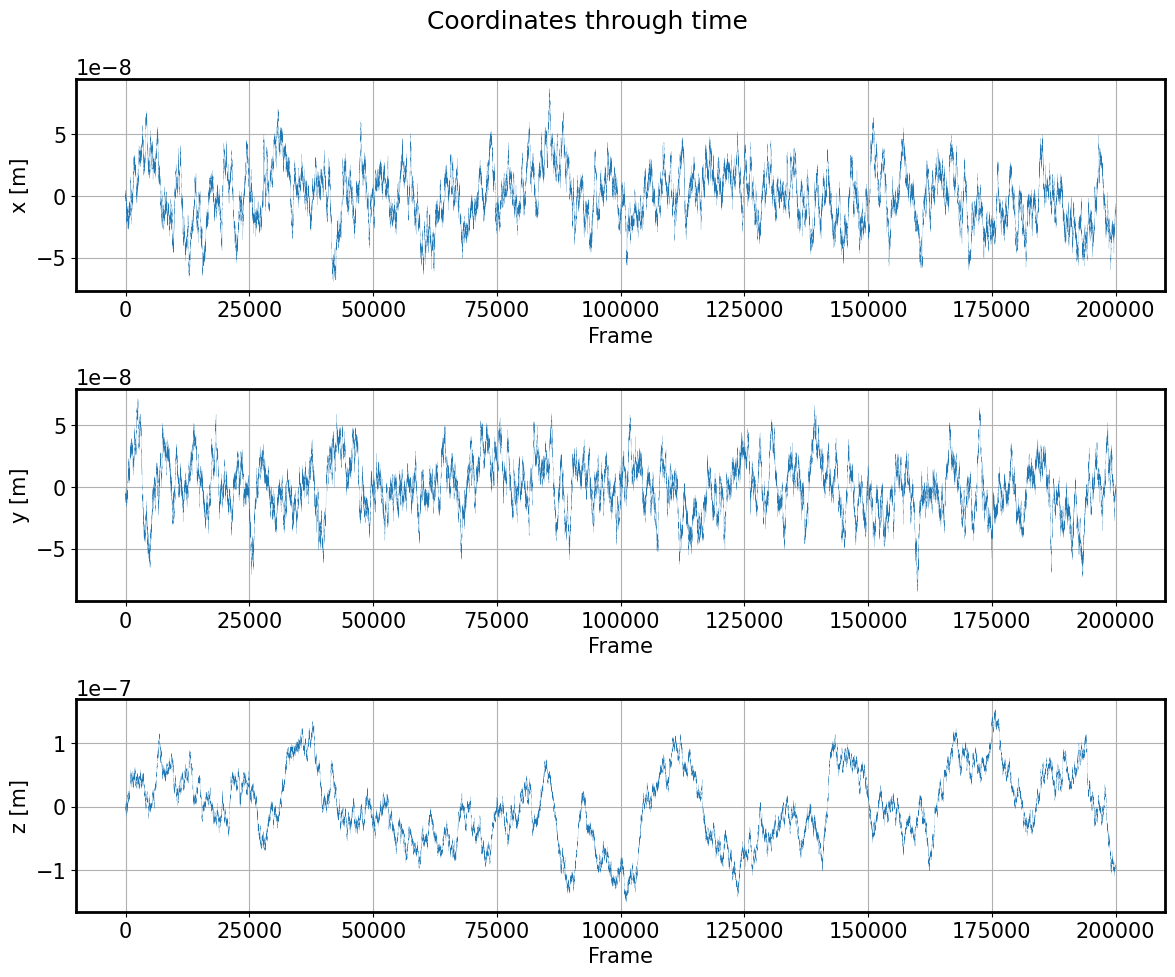

In [5]:
fig, axs = plt.subplots(3)
fig.set_figwidth(12)
fig.set_figheight(10)
fig.suptitle('Coordinates through time')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
axs[0].grid()
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('x [m]')
axs[0].plot(x, linewidth=0.1)
  
axs[1].grid()
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('y [m]')
axs[1].plot(y, linewidth=0.1)

axs[2].grid()
axs[2].set_xlabel('Frame')
axs[2].set_ylabel('z [m]')
axs[2].plot(z, linewidth=0.1)


plt.show()

In [6]:
def prob_distr(data, C, k1, k2, k3):
    kb = 1.380649*(10**-23)
    T = 300
    r, z = data
    beta = 1/(kb*T)
    U = k1*np.power(r, 4) - k2*np.power(r,2)*np.power(z,2)+k3*np.power(z,2)
    # U = k1*np.power(r, 4) +k3*np.power(r,2)*np.power(z,2)+k5*np.power(z,4)


    return C*r*np.exp(-beta*U)

def create_3d_data(r, z, group_r, group_z):
    df = pd.DataFrame()
    df['r'] = r
    df['z'] = z
    def __convert_interval_to_float__(interval):
        splitted = str(interval)[1:-1].split(',')
        return 0.5*(float(splitted[0])+float(splitted[1]))
    rs, zs, counts = [], [], []
    groups = df.groupby([pd.cut(df.r, group_r),pd.cut(df.z, group_z)])
    grouped_df = groups.size().unstack()
    for i, row in grouped_df.iterrows():
        for index_i, index in enumerate(row.index):
            rs.append(__convert_interval_to_float__(row.name))
            zs.append(__convert_interval_to_float__(index))
            counts.append(row.iloc[index_i])
    rs = np.array(rs)
    zs = np.array(zs)
    counts = np.array(counts)
    return rs, zs, counts

In [31]:
measures = pd.read_csv('../results/dataframes/filtered/hour.csv')
R = 35
conv = 2*(measures['radius'].values.mean()+R)/(1.15)
measures['x-um'] = (measures['x'].values-measures['x'].values.mean())*(1/conv)*10**-6
measures['y-um'] = (measures['y'].values-measures['y'].values.mean())*(1/conv)*10**-6
measures.head()
measures.head()


,filename,radius,x,y,z,index,x-um,y-um
0,frame46006.jpg,19.235483,788.000000,407.000000,104.048216,46006,8.468811e-09,1.756195e-08
1,frame20383.jpg,18.836752,786.594826,407.008621,107.930095,20383,-6.497804e-09,1.765377e-08
2,frame49335.jpg,18.309128,786.908028,402.810883,107.099475,49335,-3.161867e-09,-2.705666e-08
3,frame10240.jpg,17.793230,786.695976,403.856781,106.272967,10240,-5.420442e-09,-1.591671e-08
4,frame56215.jpg,18.137596,787.891304,407.978264,105.154529,56215,7.311082e-09,2.798151e-08


In [32]:
measures['r'] = np.sqrt(np.power(measures['x-um'].values,2)+np.power(measures['y-um'].values,2))
measures['z'] = measures['z'].values - measures['z'].values.mean()
measures['z-scaled'] = conv_z*measures['z']


In [33]:
measures = measures.drop(['x', 'y'], axis=1)
measures

,filename,radius,z,index,x-um,y-um,r,z-scaled
0,frame46006.jpg,19.235483,-2.364381,46006,8.468811e-09,1.756195e-08,1.949725e-08,-8.205147e-08
1,frame20383.jpg,18.836752,1.517499,20383,-6.497804e-09,1.765377e-08,1.881162e-08,5.266198e-08
2,frame49335.jpg,18.309128,0.686878,49335,-3.161867e-09,-2.705666e-08,2.724078e-08,2.383685e-08
3,frame10240.jpg,17.793230,-0.139629,10240,-5.420442e-09,-1.591671e-08,1.681437e-08,-4.845577e-09
4,frame56215.jpg,18.137596,-1.258068,56215,7.311082e-09,2.798151e-08,2.892087e-08,-4.365891e-08
...,...,...,...,...,...,...,...,...
64311,frame17536.jpg,18.030735,-2.046109,17536,-7.507800e-09,-2.139860e-08,2.267746e-08,-7.100642e-08
64312,frame10259.jpg,18.121248,0.681574,10259,6.067135e-09,-2.744403e-08,2.810667e-08,2.365275e-08
64313,frame39813.jpg,17.366514,1.729410,39813,-1.408996e-08,-4.518117e-09,1.479663e-08,6.001598e-08
64314,frame41770.jpg,17.761072,-0.592679,41770,-1.539502e-08,-5.021043e-09,1.619313e-08,-2.056782e-08


In [34]:
measures.to_csv('traces_hour.csv', index=None)

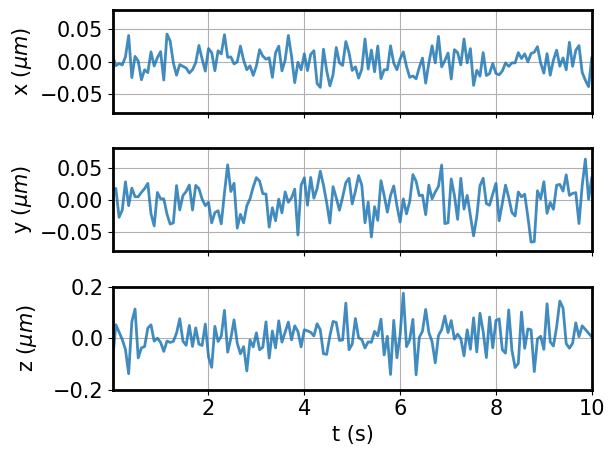

In [39]:
ax1 = plt.subplot(311)
ax1.set_ylim([-0.08, 0.08])
ax1.set_ylabel(r'x $(\mu m)$')
plt.plot(1/15*np.linspace(0, len(measures['y-um'].values)+1, len(measures['y-um'].values)), 10**6*measures['x-um'].values, linewidth=2, alpha=0.85)
plt.tick_params('x', labelbottom=False)
plt.grid()


# share x only
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_ylim([-0.08,0.08])
ax2.set_ylabel(r'y $(\mu m)$')
plt.plot(1/15*np.linspace(0, len(measures['y-um'].values)+1, len(measures['y-um'].values)), 10**6*measures['y-um'].values, linewidth=2, alpha=0.85)
# make these tick labels invisible
plt.tick_params('x', labelbottom=False)
plt.ticklabel_format(style='sci')
plt.grid()


# share x and y
ax3 = plt.subplot(313, sharex=ax1)
ax3.set_ylim([-0.2, 0.2])
ax3.set_ylabel(r'z $(\mu m)$')
plt.plot(1/15*np.linspace(0, len(measures['y-um'].values)+1, len(measures['y-um'].values)), 10**6*conv_z*measures['z'].values, linewidth=2, alpha=0.85)
plt.xlim(0.01, 10.0)
ax3.yaxis.labelpad = 10
ax3.set_xlabel('t (s)')
plt.grid()
plt.savefig('traces.pdf', dpi=300)
plt.show()

In [338]:
params[1]/4

234999999.99999997

[5.04082079e+10 9.05615332e+08 8.81119706e+07 7.90181402e-07]


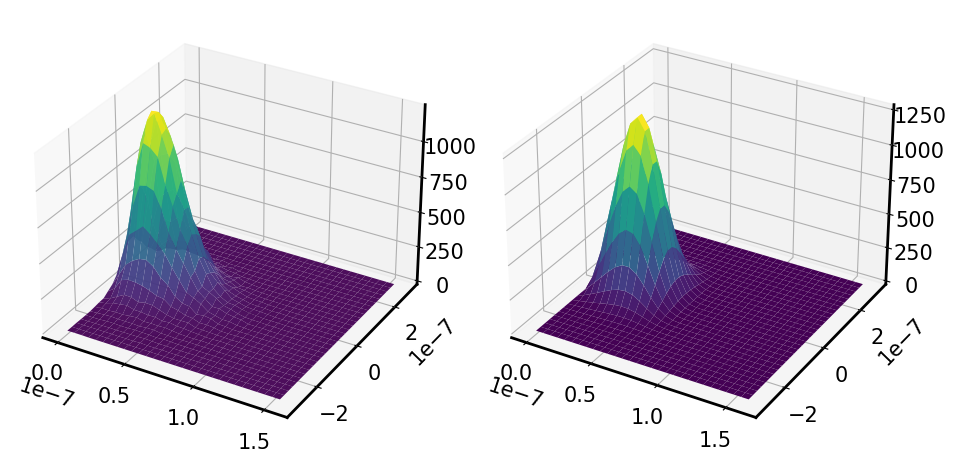

In [145]:
fig = plt.figure(figsize=plt.figaspect(0.5))
##fig.set_figwidth(5)
#fig.set_figheight(5)

limits = np.array([9e10, 9e8+1e7*np.random.random(), 9.1e7, 3e-6])
rs, zs, counts = create_3d_data(measures['r'].values, measures['z-scaled'], np.linspace(0, 1.6e-7, 30), np.linspace(-3e-7, 3e-7, 30))

params, _ = curve_fit(prob_distr, (rs, zs), counts, bounds=([0, 1e6, 8e7+1e7*np.random.random(), 0], limits))
print(params)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
hist, xedges, yedges = np.histogram2d(measures['r'].values, measures['z-scaled'].values, bins=30, range=[[0, 1.6e-7], [-3e-7, 3e-7]])
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
zpos = 0
ax1.plot_surface(xpos, ypos, hist, alpha=0.95, cmap=matplotlib.cm.viridis)
#ax.set_xticks(np.arange(0, 0.11, 0.05))
#ax.set_yticks(np.arange(-5, 5.1, 5))
#ax.set_zticks(np.arange(0.0, 1.2, 0.5))

#params = [3.20668686e+11, 9.33505078e+08, 4.26619738e+07, 4.25898051e-07]
ax = fig.add_subplot(1, 2, 2, projection='3d')
X1, Y1 = np.meshgrid(np.linspace(0, 1.6e-7, 30), np.linspace(-3e-7, 3e-7, 30))
Z1 = prob_distr((X1, Y1), params[0], params[1], params[2], params[3])
ax.plot_surface(X1, Y1, Z1, alpha=1.0, cmap=matplotlib.cm.viridis)
#ax.set_ylim([-6.6, 6.6])
ax.zaxis.set_rotate_label(False)
#plt.savefig('potential_analysis_3d_c_wc.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [139]:
np.sqrt(np.power(Z1-hist, 2).mean()), 

(295.5010280480443, 0.017430151060011556)

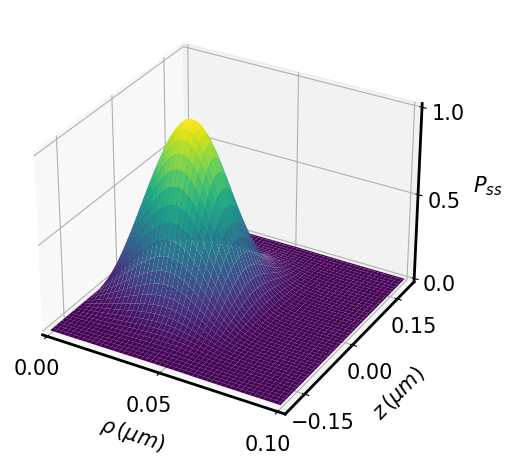

In [146]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_figwidth(5)
fig.set_figheight(5)

#params = [3.20668686e+11, 9.33505078e+08, 4.26619738e+07, 4.25898051e-07]
ax = fig.add_subplot(1, 1, 1, projection='3d')
X1, Y1 = np.meshgrid(np.linspace(0, 1.0e-7, 100), np.linspace(-2e-7, 2e-7, 100))
Z1 = prob_distr((X1, Y1), params[0], params[1], params[2], params[3])
ax.plot_surface(10**6*X1, 10**6*Y1, Z1/Z1.max(), alpha=1.0, cmap=matplotlib.cm.viridis)
ax.set_ylim([-0.2, 0.2])
ax.set_xlim([0, 0.101])
ax.set_zlim([0, 1])
ax.set_xlabel(r'$\rho\,(\mu m)$')
ax.set_ylabel(r'$z\,(\mu m)$')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$P_{ss}$')
ax.set_xticks(np.arange(0, 0.11, 0.05))
ax.set_yticks(np.arange(-0.15, 0.16, 0.15))
ax.set_zticks(np.arange(0.0, 1.2, 0.5))
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


plt.savefig('potential_analysis_3d.pdf', dpi=300, bbox_inches = 'tight')

plt.show()

In [121]:
def U(rho, z, k1, k2, k3):
    return k1*np.power(rho, 4) - k2*np.power(rho, 2)*np.power(z,2) + k3*np.power(z,2)

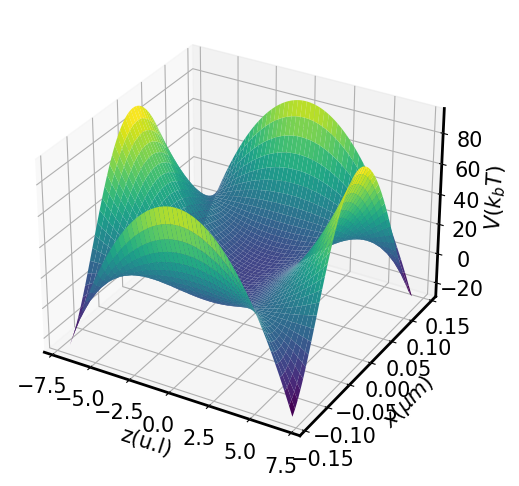

In [147]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_figwidth(5)
fig.set_figheight(5)
k1, k2, k3 = params[1], params[2], params[3]


#params = [3.20668686e+11, 9.33505078e+08, 4.26619738e+07, 4.25898051e-07]
ax = fig.add_subplot(1, 1, 1, projection='3d')
X1, Y1 = np.meshgrid(np.linspace(-1.4e-7, 1.4e-7,200), np.linspace(-7e-7, 7e-7, 200))


Z1 = prob_distr((X1, Y1), params[0], params[1], params[2], params[3])
ax.plot_surface(10**7*Y1, 10**6*X1, U(X1, Y1, k1, k2, k3)/(kb*T), alpha=1.0, cmap=matplotlib.cm.viridis, edgecolor='none')
ax.set_xlabel('z(u.l)')
ax.set_ylabel(r'$x(\mu m)$')
ax.set_zlabel(r'$V(k_b T)$')
#ax.set_xticks(np.arange(-10, 10.1, 5))
#ax.set_yticks(np.arange(-0.10, 0.11, 0.1))
#ax.set_zticks(np.arange(0, 100.1, 50))



plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

In [123]:
def U(rho, z, k1, k2, k3):
    return k1*np.power(rho, 4) - k2*np.power(rho, 2)*np.power(z,2) + k3*np.power(z,2)
params

array([5.25514147e+10, 1.00000000e+09, 5.00000000e+07, 7.29081997e-07])

/tmp/ipykernel_35748/4256382728.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(10**7*Z, 10**6*X, U(X, Z, k1, k2, k3)/(kb*T), cmap=matplotlib.cm.viridis, vmin=0, vmax=100)


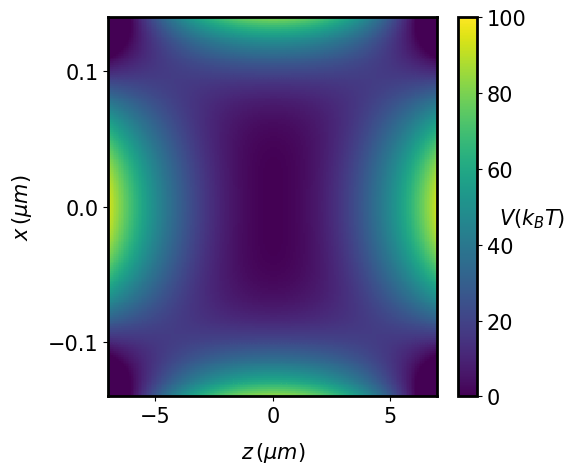

In [149]:
import matplotlib



fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(5)


X, Z = np.meshgrid(np.linspace(-1.4e-7, 1.4e-7,200), np.linspace(-7e-7, 7e-7, 200))

p = ax.pcolor(10**7*Z, 10**6*X, U(X, Z, k1, k2, k3)/(kb*T), cmap=matplotlib.cm.viridis, vmin=0, vmax=100)
cb = fig.colorbar(p, ax=ax)
#ax.zaxis.set_rotate_label(False)
cb.set_label(r'$V(k_B T)$', rotation=0)
ax.set_ylabel(r'$x\,(\mu m)$')

ax.set_xlabel(r'$z\,(\mu m)$')
#ax.set_zlabel(r'$P_{ss}$')
#ax.set_xticks(np.arange(-15, 16, 10))
ax.set_yticks(np.arange(-0.1, 0.11, 0.1))


#ax.set_yticks(np.arange(-0.15, 0.16, 0.05))
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10

plt.savefig('potential_colormap.png', dpi=300)
plt.show()

In [41]:
## def prob_distr(data, krho, kz):
    kb = 1.380649*(10**-23)
    T = 293
    r, z = data
    beta = 1/(kb*T)
    U = krho*np.power(r, 4) + kz*np.power(z,2)
    return 4*np.sqrt((4*beta*krho)/np.pi)*r*np.exp(-beta*U)

IndentationError: unexpected indent (66454313.py, line 2)

In [25]:
k_rho_fit, _ = curve_fit(prob_distr, (xpos.ravel(), ypos.ravel()), hist.ravel(), bounds=([0, -10**5], [10**8, 10**5]))
k_rho_fit

array([4.26064594e-04, 3.28724579e-07])